Week-10 Support Vector Machine

Q1)
Use the IRIS dataset, implement the SVM classifier in python (make use of scikit-learn library), to do the
following.
a. Apply the kernel functions such as linear, polynomial, Radial basis functions and Sigmoid.
b. Plot the scatter plot of the input features.
c. Plot the decision boundary.

In [17]:
import sklearn.datasets as sets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [10]:
iris = sets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:
df = pd.DataFrame(iris.data)
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
df['class'] = iris.target
df

,0,1,2,3,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
df.dropna(how="all", inplace=True) # remove any empty lines

#selecting only first 4 columns as they are the independent(X) variable
# any kind of feature selection or correlation analysis should be first done on these
X= df.iloc[:,[0,1,2,3]]

In [14]:
d = df.to_numpy()
d

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [30]:
x = d[:, :-1]
y = d[:, -1].reshape(-1, 1)

n = len(x[0])
x = x.reshape(-1, n)

print(x.shape)
print(y.shape)

(150, 4)
(150, 1)


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [28]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

a)
Apply the kernel functions such as linear, polynomial, Radial basis functions and Sigmoid.

In [32]:
linear = SVC(kernel = 'linear')
linear.fit(x_train, y_train.ravel())
y_pred1 = linear.predict(x_test)

poly = SVC(kernel = 'poly', degree = 4)
poly.fit(x_train, y_train.ravel())
y_pred2 = poly.predict(x_test)

rbf = SVC(kernel = 'rbf', random_state = 0)
rbf.fit(x_train, y_train.ravel())
y_pred3 = rbf.predict(x_test)

sig = SVC(kernel = 'sigmoid')
sig.fit(x_train, y_train.ravel(
))
y_pred4 = sig.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix as cmat, accuracy_score

print('linear: \n',cmat(y_test, y_pred1))
print('poly: \n',cmat(y_test, y_pred2))
print('rbf: \n',cmat(y_test, y_pred3))
print('sigmoid: \n',cmat(y_test, y_pred4))

linear: 
 [[16  0  0]
 [ 0  7  0]
 [ 0  0 15]]
poly: 
 [[16  0  0]
 [ 0  7  0]
 [ 0  6  9]]
rbf: 
 [[16  0  0]
 [ 0  7  0]
 [ 0  0 15]]
sigmoid: 
 [[16  0  0]
 [ 0  7  0]
 [ 0  0 15]]


b) Plot the scatter plot of the input features.

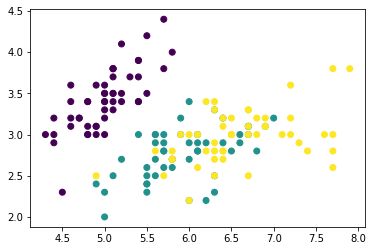

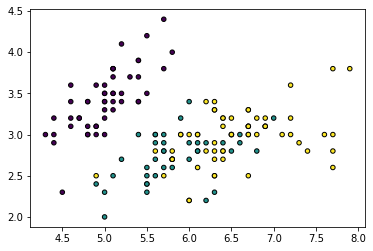

In [47]:
import matplotlib.pyplot as plt

x1 = x[:, 0]
x2 = x[:, 1]
x3 = x[:, 2]
x4 = x[:, 3]


plt.scatter(x1, x2, c = y)
plt.plot()
plt.show()

plt.scatter(x1, x2, c = y, s = 20, edgecolors = 'k')
plt.plot()
plt.show()


In [50]:
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(svm,X,response_method="predict",cmap=plt.cm.Spectral,alpha=0.8,xlabel=iris.feature_names[0],ylabel=iris.feature_names[1],)

ImportError: cannot import name 'DecisionBoundaryDisplay' from 'sklearn.inspection' (/usr/lib/python3/dist-packages/sklearn/inspection/__init__.py)